<center><img src="https://i.imgur.com/uQpMAcj.gif" ></center>
<BR>
<div>
    <h2><center style="background-color:#005f7f; color:white;">  CLOUD WARS </center></h2>
</div>
   
<br>
<p style="text-align:justify;font-size:16px"> The field of data science is varied, and today there are many different roles and responsibilities involved in the process. Data science work typically involves working with unstructured data, implementing machine learning (ML) concepts and techniques, generating insights. This process typically ends in a visual presentation of data-driven insights. Machine learning is a critical element of the process, but training ML models is often a time-consuming process that requires a lot of resources. In the past, gaining access to ML resources was difficult and expensive. Today, many cloud computing vendors offer resources for data science in the cloud. </p>
<br>

<center><img src="https://i.imgur.com/OsNW4my.png" width = 600></center>    
<p style="text-align:justify;font-size:16px">Amazon (Amazon Web Services - AWS), Google (Google Cloud Platform - GCP) and Microsoft (Azure) are three leading contenders in the public cloud space. All three do a great job by providing a wide array of machine learning and big data services, storage platforms, compute platforms, and databases. This notebook explores the machine learning options on AWS, GCP and Azure to understand which platform do the data professionals prefer.<br>  
    Before getting into exploring what our survey responses tell, let's see the big picture
to know who rules the cloud world. Generally, the king is the one who has the highest <i>market share</i>.  <br><br>    
    <i>Market share is the percent of total sales in an industry generated by a particular company. Market share is calculated by taking the company's sales over the period and dividing it by the total sales of the industry over the same period. This metric is used to give a general idea of the size of a company in relation to its market and its competitors.</i> </p>

In [1]:
import plotly.graph_objects as go
amazon_color = '#FF9900'
google_color = '#DB4437'
azure_color = '#008AD7'
text =['32%','17%','6%']
colors = [amazon_color,azure_color,google_color,'#40E0D0']

fig = go.Figure(data=[go.Pie(labels=['Amazon Web Services','Microsoft Azure','Google Cloud Platform','Others'],
                             values=[32,17,6,45])])
fig.update_traces(title = '<b>Cloud Service Providers Market Share Q1 2020</b>',titlefont_size=16,hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors))
#fig.update_layout(margin_pad = 10)
fig.show()



<p style="text-align:justify;font-size:16px">In Q1 2020, Growth in cloud services was driven by organizations around the world moving to remote working as the COVID-19 pandemic hit. As a result, enterprises sought rapid access to compute resources in the face of lockdowns and disruption. A surge in demand for online collaboration tools, ecommerce and consumer cloud services drove sharp increases in cloud infrastructure consumption, benefiting all the major cloud providers. AWS stands as the market leader in cloud services by sharing 32% of the total market in <a href="https://www.canalys.com/newsroom/worldwide-cloud-infrastructure-services-Q1-2020">Q1 2020</a> followed by Azure and Google Cloud. The cloud service providers in the others category include Alibaba cloud, SAP cloud, IBM Cloud etc. Let's fly high onto the Kaggle 2020 Survey data to check if our world boss AWS is the cumulonimbus (large cloud) among the data professionals as well! </p>

<p style="text-align:justify"> <b>Note:</b> The respondents considered are only professionals (non-professionals refers to students and unemployed) who have used cloud computing services or know about it. The respondents are picked from <i> Q26-A : Which of the following cloud computing platforms do you use on a regualr basis?</i> by removing the respondents who haven't responded to Q26-A. Out of 20036 total respondents, 6896 have them responded to Q26-A. These insights are based on the 6896 respondents. </p>

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import seaborn as sns
%matplotlib inline
import plotly.express as px


from IPython.core.display import HTML
import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv',low_memory=False)
data.drop(0,inplace=True)
data.drop('Time from Start to Finish (seconds)',axis=1,inplace=True)
data.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom',inplace = True)
data.replace('Viet Nam','Vietnam',inplace=True)
data.replace('Iran, Islamic Republic of...','Iran',inplace=True)

df_2019 = pd.read_csv('../input/kaggle-survey-2019/multiple_choice_responses.csv',low_memory=False)
df_2019.drop(0,inplace=True)
df_2019 = df_2019.dropna(subset=['Q29_Part_1',
'Q29_Part_2',
 'Q29_Part_3',
 'Q29_Part_4',
 'Q29_Part_5',
 'Q29_Part_6',
 'Q29_Part_7',
 'Q29_Part_8',
 'Q29_Part_9',
 'Q29_Part_10',
 'Q29_Part_11',
 'Q29_Part_12'],how='all')

df_2018 = pd.read_csv('../input/kaggle-survey-2018/multipleChoiceResponses.csv',low_memory=False)
df_2018.drop(0,inplace=True)
df_2018 = df_2018.dropna(subset=['Q15_Part_1',
 'Q15_Part_2',
 'Q15_Part_3',
 'Q15_Part_4',
 'Q15_Part_5',
 'Q15_Part_6',
 'Q15_Part_7'
 ], how='all')

responses_df = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv',low_memory=False)
responses_df.drop(0,inplace=True)

codes = pd.read_csv('../input/country-mapping-iso-continent-region/continents2.csv')
codes = codes[['name','alpha-3']]
codes['name'] = codes['name'].replace('Korea, Republic of','Republic of Korea')
codes['name'] = codes['name'].replace('United States','United States of America')
country_codes = dict(zip(codes.name, codes['alpha-3']))



'''
Adapted from https://www.kaggle.com/paultimothymooney/2020-kaggle-data-science-machine-learning-survey
'''

def count_then_return_percent(dataframe,column_name):
    '''
    A helper function to return value counts as percentages.
    '''
    
    counts = dataframe[column_name].value_counts(dropna=False)
    percentages = round(counts*100/(dataframe[column_name].count()),1)
    return percentages

def count_then_return_percent_for_multiple_column_questions(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question):
    '''
    A helper function to convert counts to percentages.
    '''
    
    df = dataframe
    subset = list_of_columns_for_a_single_question
    df = df[subset]
    df = df.dropna(how='all')
    total_count = len(df) 
    dictionary = dictionary_of_counts_for_a_single_question
    for i in dictionary:
        dictionary[i] = round(float(dictionary[i]*100/total_count),1)
    return dictionary

def create_dataframe_of_counts(dataframe,column,rename_index,rename_column,return_percentages=False):
    '''
    A helper function to create a dataframe of either counts 
    or percentages, for a single multiple choice question. 
    '''
    df = dataframe[column].value_counts().reset_index() 
    if return_percentages==True:
        df[column] = (df[column]*100)/(df[column].sum())
    df = pd.DataFrame(df) 
    df = df.rename({'index':rename_index, 'Q3':rename_column}, axis='columns')
    return df

def sort_dictionary_by_percent(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question): 
    ''' 
    A helper function that can be used to sort a dictionary.
    
    It is an adaptation of a similar function
    from https://www.kaggle.com/sonmou/what-topics-from-where-to-learn-data-science.
    '''
    dictionary = count_then_return_percent_for_multiple_column_questions(dataframe,
                                                                list_of_columns_for_a_single_question,
                                                                dictionary_of_counts_for_a_single_question)
    print(dictionary)
    dictionary = {v:k    for(k,v) in dictionary.items()}
    list_tuples = sorted(dictionary.items(), reverse=False) 
    dictionary = {v:k for (k,v) in list_tuples}   
    return dictionary


def binarize_data(df):
    '''
    A utility function to binarize the data.
    '''
    df_cols = df.columns
    for col in df.columns:
        if "_Part_" in col or 'OTHER' in col:
            k = df[col].value_counts()
            df[col] = df[col].replace(k.keys()[0],True)
            df[col] = df[col].fillna(False)
            df[col] = df[col].astype('bool')
    return df

q23_dictionary_of_counts = {
    'Analyze and understand data to influence product or business decisions' : (responses_df['Q23_Part_1'].count()),
    'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data': (responses_df['Q23_Part_2'].count()),
    'Build prototypes to explore applying machine learning to new areas' : (responses_df['Q23_Part_3'].count()),
    'Build and/or run a machine learning service that operationally improves my product or workflows' : (responses_df['Q23_Part_4'].count()),
    'Experimentation and iteration to improve existing ML models' : (responses_df['Q23_Part_5'].count()),
    'Do research that advances the state of the art of machine learning' : (responses_df['Q23_Part_6'].count()),
    'None of these activities are an important part of my role at work' : (responses_df['Q23_Part_7'].count()),
    'Other' : (responses_df['Q23_OTHER'].count())
}

q26a_dictionary_of_counts = {
    'Amazon Web Services (AWS)' : (responses_df['Q26_A_Part_1'].count()),
    'Microsoft Azure': (responses_df['Q26_A_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df['Q26_A_Part_3'].count()),
    'IBM Cloud / Red Hat' : (responses_df['Q26_A_Part_4'].count()),
    'Oracle Cloud' : (responses_df['Q26_A_Part_5'].count()),
    'SAP Cloud' : (responses_df['Q26_A_Part_6'].count()),
    'Salesforce Cloud' : (responses_df['Q26_A_Part_7'].count()),
    'VMware Cloud' : (responses_df['Q26_A_Part_8'].count()),
    'Alibaba Cloud' : (responses_df['Q26_A_Part_9'].count()),
    'Tencent Cloud' : (responses_df['Q26_A_Part_10'].count()),
    'None' : (responses_df['Q26_A_Part_11'].count()),
    'Other' : (responses_df['Q26_A_OTHER'].count())
}

q10_list_of_columns = ['Q10_Part_1',
                       'Q10_Part_2',
                       'Q10_Part_3',
                       'Q10_Part_4',
                       'Q10_Part_5',
                       'Q10_Part_6',
                       'Q10_Part_7',
                       'Q10_Part_8',
                       'Q10_Part_9',
                       'Q10_Part_10',
                       'Q10_Part_11',
                       'Q10_Part_12',
                       'Q10_Part_13',
                       'Q10_OTHER']
q23_list_of_columns = ['Q23_Part_1',
                       'Q23_Part_2',
                       'Q23_Part_3',
                       'Q23_Part_4',
                       'Q23_Part_5',
                       'Q23_Part_6',
                       'Q23_Part_7',
                       'Q23_OTHER']

q26a_list_of_columns = ['Q26_A_Part_1',
                        'Q26_A_Part_2',
                        'Q26_A_Part_3',
                        'Q26_A_Part_4',
                        'Q26_A_Part_5',
                        'Q26_A_Part_6',
                        'Q26_A_Part_7',
                        'Q26_A_Part_8',
                        'Q26_A_Part_9',
                        'Q26_A_Part_10',
                        'Q26_A_Part_11',
                        'Q26_A_OTHER']


q27a_list_of_columns = ['Q27_A_Part_1',
                        'Q27_A_Part_2',
                        'Q27_A_Part_3',
                        'Q27_A_Part_4',
                        'Q27_A_Part_5',
                        'Q27_A_Part_6',
                        'Q27_A_Part_7',
                        'Q27_A_Part_8',
                        'Q27_A_Part_9',
                        'Q27_A_Part_10',
                        'Q27_A_Part_11',
                        'Q27_A_OTHER']


q28a_list_of_columns = ['Q28_A_Part_1',
                        'Q28_A_Part_2',
                        'Q28_A_Part_3',
                        'Q28_A_Part_4',
                        'Q28_A_Part_5',
                        'Q28_A_Part_6',
                        'Q28_A_Part_7',
                        'Q28_A_Part_8',
                        'Q28_A_Part_9',
                        'Q28_A_Part_10',
                        'Q28_A_OTHER']


q29a_list_of_columns = ['Q29_A_Part_1',
                        'Q29_A_Part_2',
                        'Q29_A_Part_3',
                        'Q29_A_Part_4',
                        'Q29_A_Part_5',
                        'Q29_A_Part_6',
                        'Q29_A_Part_7',
                        'Q29_A_Part_8',
                        'Q29_A_Part_9',
                        'Q29_A_Part_10',
                        'Q29_A_Part_11',
                        'Q29_A_Part_12',
                        'Q29_A_Part_13',
                        'Q29_A_Part_14',
                        'Q29_A_Part_15',
                        'Q29_A_Part_16',
                        'Q29_A_Part_17',
                        'Q29_A_OTHER']
q31a_list_of_columns = ['Q31_A_Part_1',
                        'Q31_A_Part_2',
                        'Q31_A_Part_3',
                        'Q31_A_Part_4',
                        'Q31_A_Part_5',
                        'Q31_A_Part_6',
                        'Q31_A_Part_7',
                        'Q31_A_Part_8',
                        'Q31_A_Part_9',
                        'Q31_A_Part_10',
                        'Q31_A_Part_11',
                        'Q31_A_Part_12',
                        'Q31_A_Part_13',
                        'Q31_A_Part_14',
                        'Q31_A_OTHER']

In [3]:
q26a_dictionary = count_then_return_percent_for_multiple_column_questions(responses_df,q26a_list_of_columns,q26a_dictionary_of_counts)

gcp_2018 = round(float(df_2018['Q15_Part_1'].count()*100/len(df_2018)),1)
aws_2018 = round(float(df_2018['Q15_Part_2'].count()*100/len(df_2018)),1)
azure_2018 = round(float(df_2018['Q15_Part_3'].count()*100/len(df_2018)),1)
gcp_2019 = round(float(df_2019['Q29_Part_1'].count()*100/len(df_2019)),1)
aws_2019 = round(float(df_2019['Q29_Part_2'].count()*100/len(df_2019)),1)
azure_2019 = round(float(df_2019['Q29_Part_3'].count()*100/len(df_2019)),1)

azure = [azure_2018,azure_2019,q26a_dictionary['Microsoft Azure'],]
google = [gcp_2018,gcp_2019,q26a_dictionary['Google Cloud Platform (GCP)']]
aws = [aws_2018,aws_2019,q26a_dictionary['Amazon Web Services (AWS)']]
y_2020 = [q26a_dictionary['Microsoft Azure'],q26a_dictionary['Google Cloud Platform (GCP)'],q26a_dictionary['Amazon Web Services (AWS)']]
y_2018 = [azure_2018,gcp_2018,aws_2018]
y_2019 = [azure_2019,gcp_2019,aws_2019]
names = ['2018','2019','2020']

fig = go.Figure(data=[
    go.Bar(name='Microsoft Azure', x=names, y=azure, marker_color=azure_color,width=[0.2,0.2,0.2] ),
    go.Bar(name='Google Cloud Platform', x=names, y=google,marker_color=google_color,width=[0.2,0.2,0.2]),
    go.Bar(name='Amazon Web Services', x=names, y=aws,marker_color=amazon_color,width=[0.2,0.2,0.2])
])

fig.update_layout(barmode='group',template='plotly_white',grid=None,title_text='<b>Growth of Cloud Service Providers (2018 - 2020)</b>',
                   xaxis=dict(
        
        
        tickfont_size=14,
    ),yaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ),margin_pad=10)

fig.show()

<p style="text-align:justify;font-size:18px"> <b>INSIGHTS:</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> AWS stands as the leader! </li>
    <li style="font-size:1em"> Second and third position grabbed by GCP and Azure respectively which is in contradictory to the world market share. </li>
</ol>

<p style="text-align:justify;font-size:16px">    <i>A contradiction is interesting than a tautology!</i> hence, let's concentrate on insight point 2.  There could be several reasons where one prefers GCP to Azure but, one of the reasons could be Kaggle! but, why Kaggle? <a href="https://www.kaggle.com/general/29781">Kaggle had joined with Google </a> 4 years back and recently in 2020 there was a <a href="https://www.kaggle.com/product-feedback/159602">feature launch</a> where the Kagglers can run their notebook on Google cloud. This make GCP famliar and easily accessible for Kagglers and hence higher number of users. </p> 

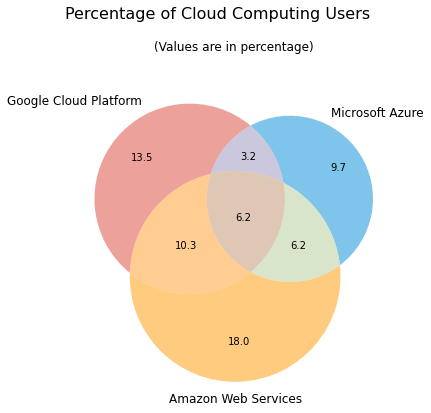

In [4]:
df = data[q26a_list_of_columns]
df.dropna(how='all',inplace=True)
df = binarize_data(df)

df['Q26_Google'] = df['Q26_A_Part_3']
df['Q26_Amazon'] = df['Q26_A_Part_1']
df['Q26_Microsoft'] = df['Q26_A_Part_2']

df['Q26_GandM'] = df['Q26_Google'] * df['Q26_Microsoft']
df['Q26_GandA'] = df['Q26_Google'] * df['Q26_Amazon']
df['Q26_MandA'] = df['Q26_Amazon'] * df['Q26_Microsoft']
df['Q26_GandMandA'] = df['Q26_Google'] * df['Q26_Amazon'] * df['Q26_Microsoft']
plt.figure(figsize=(15,6))
venn3(subsets = (13.5, 9.7, 3.2, 18.0, 10.3, 6.2, 6.2),set_colors=(google_color,azure_color,amazon_color), set_labels = ('Google Cloud Platform', 'Microsoft Azure', 'Amazon Web Services'), alpha = 0.5);

plt.suptitle('Percentage of Cloud Computing Users ',y = 1.05,fontsize=16,color='black')          
plt.title('(Values are in percentage)',pad=30)
plt.show() 

<p style="text-align:justify;font-size:18px"> <b>INSIGHTS:</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> 6.2% users use all the 3 cloud service! </li>
    <li style="font-size:1em"> AWS has 18% it's own customers. </li>
</ol>


<p style="text-align:justify;font-size:16px"> This Venn diagram is based on question Q26-A: <i> Which of the following cloud computing platforms do you use on regular basis </i>, where the respondents can choose more than one cloud service. The purpose of this diagram is to understand the overlaps of preference. Clearly, the users seem comfortable with AWS and there is a good overlap between AWS and GCP. </p> 

In [5]:
df = data.dropna(axis=0,subset = q26a_list_of_columns,how='all')
countries = list(df['Q3'].unique())
countries.remove('Other')
product = []
percentage = []
country_list = []
country_code = []

for country in countries:
    temp_df = df[df['Q3'] == country]
    country_list.append(country)
    country_code.append(country_codes[country])
    product.append('Amazon Web Services')
    percentage.append(round(float(temp_df['Q26_A_Part_1'].count()*100/len(df)),1)) 
    country_list.append(country)
    country_code.append(country_codes[country])
    product.append('Microsoft Azure')
    percentage.append(round(float(temp_df['Q26_A_Part_2'].count()*100/len(df)),1)) 
    country_list.append(country)
    country_code.append(country_codes[country])
    product.append('Google Cloud Platform')
    percentage.append(round(float(temp_df['Q26_A_Part_3'].count()*100/len(df)),1)) 
    
df = pd.DataFrame(list(zip(country_list,country_code, product,percentage)), columns =['country','code' ,'Cloud Computing Platforms','percentage']) 

fig = px.scatter_geo(df, locations="code", color="Cloud Computing Platforms",
                     hover_name="country", size="percentage",
                     projection="natural earth",title='<b>Percentage of Cloud Computing Platform Users : Worldwide</b><br>(Toggle the legend)',size_max=30,opacity=0.5)
fig.data[0]['marker'].update(color=amazon_color) 
fig.data[1]['marker'].update(color=azure_color) 
fig.data[2]['marker'].update(color=google_color)
fig.show()

<p style="text-align:justify;font-size:18px"> <b>INSIGHTS</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> India and United States of America tops the list for all the three cloud services </li>
    
</ol>

<p style="text-align:justify;font-size:16px">In India, though GCP has significant amount of users they are mostly public users, the enterprise conquering battle is highly between AWS and Azure. Microsoft has been especially aggressive in its India expansion. In February 2017, e-commerce giant <a href="https://news.microsoft.com/en-in/flipkart-and-microsoft-forge-cloud-partnership-to-expand-e-commerce-in-india/">Flipkart signed an exclusive arrangement with Microsoft</a>, and transitioned from AWS to Azure. The most significant partnership for <a href="https://news.microsoft.com/2019/08/12/jio-and-microsoft-announce-alliance-to-accelerate-digital-transformation-in-india/#:~:text=As%20part%20of%20this%20new,the%20Microsoft%20Azure%20cloud%20platform.&text=Through%20these%20Jio%2Ddeveloped%20solutions,a.">Microsoft in India is with Reliance Jio</a>. In August 2019, the two entities entered into a 10-year strategic partnership, where Jio would set up data centers across India, with Microsoft deploying its Azure platform to support Jio’s offerings. While Microsoft has been aggressive in its India bets, AWS is showing its competitive intent with its <a href="https://www.airtel.in/press-release/08-2020/airtel-and-aws-join-hands-to-accelerate-digital-transformation-of-business-in-india">Airtel partnership.</a>

    


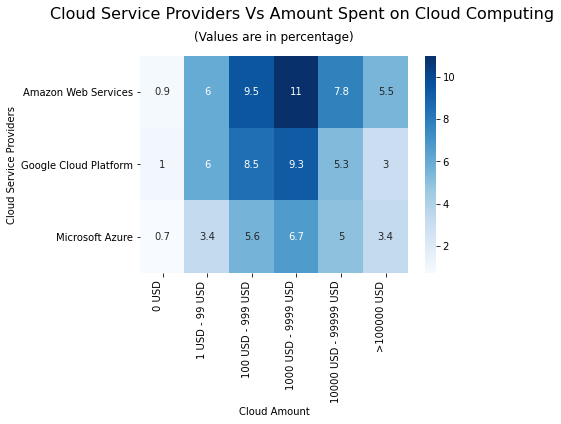

In [6]:
df = data[q26a_list_of_columns]
df['Q25'] = data['Q25']
df = df.dropna(subset=q26a_list_of_columns, how='all')
df = df[df['Q25'].notna()]

cloud_amt = list(df['Q25'].unique())
product = []
percentage = []
cloud_amt_list = []
for amt in cloud_amt:
    temp_df = df[df['Q25'] == amt]
    cloud_amt_list.append(amt)
    product.append('Amazon Web Services')
    percentage.append(round(float(temp_df['Q26_A_Part_1'].count()*100/len(df)),1))
    
    cloud_amt_list.append(amt)
    product.append('Microsoft Azure')
    percentage.append(round(float(temp_df['Q26_A_Part_2'].count()*100/len(df)),1)) 
    
    cloud_amt_list.append(amt)
    product.append('Google Cloud Platform')
    percentage.append(round(float(temp_df['Q26_A_Part_3'].count()*100/len(df)),1)) 
heat_map_df = pd.DataFrame(list(zip(cloud_amt_list,product,percentage)), columns =['Cloud Amount' ,'Cloud Service Providers','percentage']) 
heat_map_df = heat_map_df.pivot( "Cloud Service Providers","Cloud Amount", "percentage")
heat_map_df['0 USD'] = heat_map_df['$0 ($USD)']
heat_map_df['1 USD - 99 USD'] = heat_map_df['$1-$99']
heat_map_df['100 USD - 999 USD'] = heat_map_df['$100-$999']
heat_map_df['1000 USD - 9999 USD'] = heat_map_df['$1000-$9,999']
heat_map_df['10000 USD - 99999 USD'] = heat_map_df['$10,000-$99,999']
heat_map_df['>100000 USD'] = heat_map_df['$100,000 or more ($USD)']

heat_map_df.drop(['$0 ($USD)','$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','$100,000 or more ($USD)'],axis=1,inplace=True)
heatmap = sns.heatmap(heat_map_df, cmap="Blues", annot=True);
plt.suptitle('Cloud Service Providers Vs Amount Spent on Cloud Computing',
fontsize=16,y = 1.05)
plt.title('(Values are in percentage)',pad=15)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right');
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right');

<p style="text-align:justify;font-size:18px"> <b>INSIGHTS</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> More amount is spent on AWS hence higher revenue for AWS from the Kagglers! </li>
    <li style="font-size:1em"> For all the three platforms, higher percentage of users spend between 1000 USD and 9999 USD </li>
</ol>

<p style="text-align:justify;font-size:16px"> This heatmap reminds us to explore the revenue these cloud services provide their parent Amazon, Google and Microsoft. According to <a href = "https://www.canalys.com/newsroom/canalys-battle-for-enterprise-cloud-customers-intensifies-as-spending-grows-42-in-q1-2019"> Canalys Report </a>AWS earned more than 7.6 billion USD in Q1 2019 alone. Azure earned Microsoft a total of 3.4 billion USD  for the same period. It's revenue has grown by 75% since Q1 2018. Google, however, boasts the best results out of this bunch. Their cloud service’s revenue was 2.3 billion USD , which means an 83% growth from the 1.2 billion USD the company made in Q1 2018. 
<center><img src="https://www.canalys.com/static/campaign/114/cloud-pr-q1-2019.jpg" height =600 width = 600 ></center>
 <br>  
<p style="text-align:justify;font-size:14px"> <b>BROWNIE POINT:</b> Did you know that <a href="https://www.cnbc.com/2019/04/25/aws-earnings-q1-2019.html"> Apple pays Amazon </a>more than 30 million USD each month? Why? To deliver iCloud and other Apple services to consumers. Lyft and Pinterest will spend more than 1 billion USD combined on AWS in the next few years.

In [7]:
df = data[q26a_list_of_columns]
df['Q5'] = data['Q5']
df = df.dropna(subset=q26a_list_of_columns, how='all')
df = df[df['Q5'].notna()]

roles = list(df['Q5'].unique())
product = []
percentage = []
roles_list = []

for role in roles:
    temp_df = df[df['Q5'] == role]
    roles_list.append(role)
    product.append('Amazon Web Services')
    percentage.append(round(float(temp_df['Q26_A_Part_1'].count()*100/len(df)),1))
    
    roles_list.append(role)
    product.append('Microsoft Azure')
    percentage.append(round(float(temp_df['Q26_A_Part_2'].count()*100/len(df)),1)) 
    
    roles_list.append(role)
    product.append('Google Cloud Platform')
    percentage.append(round(float(temp_df['Q26_A_Part_3'].count()*100/len(df)),1)) 
    
df = pd.DataFrame(list(zip(roles_list,product,percentage)), columns =['Role' ,'Cloud Service Providers','percentage']) 

fig = px.bar(df, x="Role", y="percentage",
             color='Cloud Service Providers', barmode='group',
             height=400,color_discrete_sequence=[amazon_color,azure_color,google_color])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='Cloud Service Providers Vs Job Roles',
                   yaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

<p style="text-align:justify;font-size:18px"> <b>INSIGHTS:</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> The preference of cloud service is the same among all job roles (AWS > GCP > Azure). </li>
    <li style="font-size:1em"> Database Administrators (DBAs)/Database engineers and statisticians are the least users. </li>
</ol>


<p style="text-align:justify;font-size:16px"> It's pretty straight forward that statisticians are using cloud less. The roles of DBAs are currently changing! DBAs have been the gatekeepers to a business’s most valuable asset: its data. They design, implement, and maintain the business’s database systems. But as more businesses move from traditional software to cloud solutions and as more software vendors automate monitoring, testing, patching, and tuning the DBA’s fate seems sealed. Even Oracle CEO Mark Hurd, who in May, 2018 while <a href= "https://www.forbes.com/sites/bobevans1/2018/05/10/oracle-ceo-mark-hurd-how-to-instantly-prevent-95-of-database-cyberattacks/?sh=328e022c675a">announcing a new cloud-based autonomous database </a> said <i> “There are hundreds of thousands of DBAs managing Oracle databases, if all of that moved to the autonomous database, that number would change to zero.”</i> But, is it true? in my opinion DBA role isn't going away, it's evolving! </p> 

In [8]:
df = data[q26a_list_of_columns]
df['Q6'] = data['Q6']
df = df.dropna(subset=q26a_list_of_columns, how='all')
df = df[df['Q6'].notna()]

experience = list(df['Q6'].unique())
product = []
percentage = []
exp_list = []

for exp in experience:
    temp_df = df[df['Q6'] == exp]
    exp_list.append(exp)
    product.append('Amazon Web Services')
    percentage.append(round(float(temp_df['Q26_A_Part_1'].count()*100/len(df)),1))
    
    exp_list.append(exp)
    product.append('Microsoft Azure')
    percentage.append(round(float(temp_df['Q26_A_Part_2'].count()*100/len(df)),1)) 
    
    exp_list.append(exp)
    product.append('Google Cloud Platform')
    percentage.append(round(float(temp_df['Q26_A_Part_3'].count()*100/len(df)),1)) 

df = pd.DataFrame(list(zip(exp_list,product,percentage)), columns =['Experience' ,'Cloud Service Providers','percentage']) 

fig = px.bar(df, x="Experience", y="percentage",
             color='Cloud Service Providers', barmode='group',
             height=400,color_discrete_sequence=[amazon_color,azure_color,google_color])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='Cloud Service Providers Vs Coding Experience',
                   yaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

<p style="text-align:justify;font-size:18px"> <b>INSIGHTS</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> Beginners (less than 1 year coding experience) GCP </li>
    <li style="font-size:1em"> Experienced users prefer AWS. </li>
</ol>


<p style="text-align:justify;font-size:16px"> These insights are highly contradictory to the <a href ="https://resources.flexera.com/web/media/documents/rightscale-2019-state-of-the-cloud-report-from-flexera.pdf"> State of the Cloud </a> report by RightScale, 2019. According to the RightScale report AWS attracts almost half of the early-stage cloud users (52%), and Azure is chosen by 41%. Google’s results generally come from more advanced users (24% adoption), while only 9% of beginners start with Google Cloud. </p> 

****
<p style="text-align:justify;font-size:16px"> The cloud service providers offers a broad set of global cloud-based products including compute, storage, databases, analytics, networking, mobile, developer tools, management tools, IoT, security and enterprise applications. These services help organizations move faster, lower IT costs, and scale. The products of AWS, GCP and Azure are compared to know which product is preferred. Though there are many products launched by these service providers, only the products which are mentioned in the survey questions are compared in this work. The below table list outs cloud service products and tools mentioned in the survey.</p>
<center><img src="https://i.imgur.com/OvFEmuT.png" height =600 width = 700 ></center>


<div>
    <h2><center style="background-color:#005f7f; color:white;">  NOTEBOOK PRODUCTS </center></h2>
</div>
<br>
<br>
<center><img src="https://i.imgur.com/lYyVkZE.png" height =600 width = 600 ></center>

<p style="text-align:justify;font-size:16px"> Notebooks are becoming the de-facto standard for prototyping and analysis for data professionals. The notebook environment allows us to keep track of errors and maintain clean code. Cloud service providers, see the value of a notebook environment which is why these companies now offer cloud hosted notebooks that are hosted on the cloud and accessible to millions of people. Many Data Scientists do not have the necessary hardware for conducting large scale Deep Learning, but with cloud hosted environments, the hardware and backend configurations are mostly taken care which leaves the user to only configure their desired parameters such as CPU/GPU/TPU, RAM, Cores etc.

In [9]:
df = data[q10_list_of_columns]
df = df.dropna(how='all')

m_azure_notebook = round(float(df['Q10_Part_3'].count()*100/len(df)),1)
a_sagemaker = round(float(df['Q10_Part_8'].count()*100/len(df)),1)
a_emr = round(float(df['Q10_Part_9'].count()*100/len(df)),1)
g_cloudai = round(float(df['Q10_Part_10'].count()*100/len(df)),1)
g_cloud_datalab = round(float(df['Q10_Part_11'].count()*100/len(df)),1)
g_colab = round(float(df['Q10_Part_2'].count()*100/len(df)),1)

names = ['Azure Notebooks','Colab Notebooks','Google Cloud AI Platform Notebooks','Google Cloud Datalab Notebooks','Amazon Sagemaker Studio','Amazon EMR Notebooks']
values = [m_azure_notebook,g_colab,g_cloudai,g_cloud_datalab,a_sagemaker,a_emr]
colors = [azure_color,google_color,google_color,google_color,amazon_color,amazon_color]

fig = go.Figure(data=[go.Bar(
    y=names,
    x=values,
    orientation='h',
    marker_color=colors, 
    
)])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='<b>Cloud Service Providers - Notebook Products</b>',
                   xaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ),yaxis=dict(
        
        
    ),margin_pad=10)


<p style="text-align:justify;font-size:18px"> <b>INSIGHTS</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> Colab has significantly high number of users - 37%. </li>
    <li style="font-size:1em"> Amazon seems a loser when it comes to notebooks </li>
</ol>


<p style="text-align:justify;font-size:16px"> Higher number of users prefer Google notebooks so clearly it's the winner. Colab has large user base and the other two products (Google Cloud AI Platforms Notebook + Google Cloud Datalab Notebooks) of Google also has appreciable amount of users than Amazon's notebook products. </p> 

<div>
    <h2><center style="background-color:#005f7f; color:white;">  CLOUD COMPUTING PRODUCTS </center></h2>
</div>
<br>
<br>
<center><img src="https://i.imgur.com/l1hPMAG.png" height =600 width = 600 ></center>

<p style="text-align:justify;font-size:16px">Compute services can be considered as the brains and processing power required by applications and systems to carry out computational tasks via a series of instructions. So essentially, compute is closely related to common server components, such as CPUs and RAM. Each of these cloud platforms has a number of different services and features that offer compute power to provide different functions. Compute services can be consumed in different quantities, for different lengths of time across a range of categories, offering a wide scope of performance and benefit options. So it depends on our requirements to use which compute service.

In [10]:
df = data[q27a_list_of_columns]
df = df.dropna(how='all')
names = []
values = []
colors = []

a_ec2 = round(float(df['Q27_A_Part_1'].count()*100/len(df)),1)
names.append('Amazon EC2')
values.append(a_ec2)
colors.append(amazon_color)

a_lambda = round(float(df['Q27_A_Part_2'].count()*100/len(df)),1)
names.append('Amazon Lambda')
values.append(a_lambda)
colors.append(amazon_color)

a_ecs = round(float(df['Q27_A_Part_3'].count()*100/len(df)),1)
names.append('Amazon Elastic Container Service')
values.append(a_ecs)
colors.append(azure_color)

m_cloud = round(float(df['Q27_A_Part_4'].count()*100/len(df)),1)
names.append('Azure Cloud Services')
values.append(m_cloud)
colors.append(azure_color)

m_aci = round(float(df['Q27_A_Part_5'].count()*100/len(df)),1)
names.append('Microsoft Azure Container Instances')
values.append(m_aci)
colors.append(azure_color)

m_functions = round(float(df['Q27_A_Part_6'].count()*100/len(df)),1)
names.append('Azure Functions')
values.append(m_functions)
colors.append(azure_color)

g_engine = round(float(df['Q27_A_Part_7'].count()*100/len(df)),1)
names.append('Google Cloud Compute Engine')
values.append(g_engine)
colors.append(google_color)

g_functions = round(float(df['Q27_A_Part_8'].count()*100/len(df)),1)
names.append('Google Cloud Functions')
values.append(g_functions)
colors.append(google_color)

g_run = round(float(df['Q27_A_Part_9'].count()*100/len(df)),1)
names.append('Google Cloud Run')
values.append(g_run)
colors.append(google_color)

g_app = round(float(df['Q27_A_Part_10'].count()*100/len(df)),1)
names.append('Google Cloud App Engine')
values.append(g_app)
colors.append(google_color)


fig = go.Figure(data=[go.Bar(
    y=names,
    x=values,
    orientation='h',
    marker_color=colors 
)])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='<b>Cloud Service Providers - Cloud Computing Products</b>',
                   xaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ),yaxis=dict(
        
        
    ),margin_pad=10)

<p style="text-align:justify;font-size:18px"> <b>INSIGHTS</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> AWS's compute services seems popular than the other two so cleary AWS is the winner here. </li>

</ol>


<div>
    <h2><center style="background-color:#005f7f; color:white;">  MACHINE LEARNING PRODUCTS </center></h2>
</div>
<br>
<br>
<center><img src="https://i.imgur.com/TnyrATq.png" height =600 width = 600  ></center>

<p style="text-align:justify;font-size:16px"> Earlier, machine learning was out of reach for enterprise budgets but today, cloud platform's machine learning services makes it affordable. Most enterprises these days use some sort of cloud computing web services to use machine learning for a fee so that they can focus on their core business and not spend many finances on cultivating their own machine learning infrastructure from scratch.

In [11]:
df = data[q28a_list_of_columns]
df = df.dropna(how='all')
names = []
values = []
colors = []

a_sage = round(float(df['Q28_A_Part_1'].count()*100/len(df)),1)
names.append('Amazon SageMaker')
values.append(a_sage)
colors.append(amazon_color)

a_forecast = round(float(df['Q28_A_Part_2'].count()*100/len(df)),1)
names.append('Amazon Forecast')
values.append(a_forecast)
colors.append(amazon_color)

a_rekog = round(float(df['Q28_A_Part_3'].count()*100/len(df)),1)
names.append('Amazon Rekognition')
values.append(a_rekog)
colors.append(amazon_color)

m_mls = round(float(df['Q28_A_Part_4'].count()*100/len(df)),1)
names.append('Azure Machine Learning Studio')
values.append(m_mls)
colors.append(azure_color)

m_cognitive = round(float(df['Q28_A_Part_5'].count()*100/len(df)),1)
names.append('Azure Cognitive Services')
values.append(m_cognitive)
colors.append(azure_color)

g_ai = round(float(df['Q28_A_Part_6'].count()*100/len(df)),1)
names.append('Google Cloud AI Platform')
values.append(g_ai)
colors.append(google_color)

g_videoai = round(float(df['Q28_A_Part_7'].count()*100/len(df)),1)
names.append('Google Cloud Video AI')
values.append(g_videoai)
colors.append(google_color)

g_nlp = round(float(df['Q28_A_Part_8'].count()*100/len(df)),1)
names.append('Google Cloud Natural Language')
values.append(g_nlp)
colors.append(google_color)

g_vision = round(float(df['Q28_A_Part_9'].count()*100/len(df)),1)
names.append('Google Cloud Vision AI')
values.append(g_vision)
colors.append(google_color)

fig = go.Figure(data=[go.Bar(
    y=names,
    x=values,
    orientation='h',
    marker_color=colors 
)])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='<b>Cloud Service Providers - Machine Learning Products</b>',
                   xaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ),yaxis=dict(
        
        
    ),margin_pad=10)

<p style="text-align:justify;font-size:18px"> <b>INSIGHTS</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> All the three have atleast one product which has good number of users. </li>
    <li style="font-size:1em"> Google cloud AI platform tops the list. </li>
</ol>


<p style="text-align:justify;font-size:16px">Google is the winner here! The reason could be the diversity of services they provide. It's covers various sub-domains of Artificial intelligence such as Natural Language Processing, Computer Vision and within computer vision a separate platform for video analytics. </p> 

<div>
    <h2><center style="background-color:#005f7f; color:white;">  BIG DATA PRODUCTS </center></h2>
</div>
<br>
<br>
<center><img src="https://i.imgur.com/FCaCFd6.png" height =600 width = 600 ></center>

<p style="text-align:justify;font-size:16px"> Big data and cloud are perfect partners. Big data are in demand because, the ability to consistently get business value from data is now a trait of successful organizations across every industry, and of every size. In some industries, it’s even a matter of survival. By 2025, it’s estimated that <a href="https://www.visualcapitalist.com/how-much-data-is-generated-each-day/" > 463 exabytes </a> of data will be created each day globally. Because of the enormity and sensitivity of such data, it is important to keep it in a efficient and secure platform, the cloud! cloud computing provides the option of storing significant amounts of data with the help of scalability, fault tolerance and availability.

In [12]:
df = data[q29a_list_of_columns]
df = df.dropna(how='all')
names = []
values = []
colors = []

a_redshift = round(float(df['Q29_A_Part_11'].count()*100/len(df)),1)
names.append('Amazon Redshift')
values.append(a_redshift)
colors.append(amazon_color)

a_athena = round(float(df['Q29_A_Part_12'].count()*100/len(df)),1)
names.append('Amazon Athena')
values.append(a_athena)
colors.append(amazon_color)

a_DynamoDB = round(float(df['Q29_A_Part_13'].count()*100/len(df)),1)
names.append('Amazon DynamoDB')
values.append(a_DynamoDB)
colors.append(amazon_color)


m_datalake = round(float(df['Q29_A_Part_10'].count()*100/len(df)),1)
names.append('Microsoft Azure Data Lake Storage')
values.append(m_datalake)
colors.append(azure_color)

g_bigquery = round(float(df['Q29_A_Part_14'].count()*100/len(df)),1)
names.append('Google Cloud Bigquery')
values.append(g_bigquery)
colors.append(google_color)

g_sql = round(float(df['Q29_A_Part_15'].count()*100/len(df)),1)
names.append('Google Cloud SQL')
values.append(g_sql)
colors.append(google_color)

g_firestore = round(float(df['Q29_A_Part_16'].count()*100/len(df)),1)
names.append('Google Cloud Firestore')
values.append(g_firestore)
colors.append(google_color)



fig = go.Figure(data=[go.Bar(
    y=names,
    x=values,
    orientation='h',
    marker_color=colors
)])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='<b>Cloud Service Providers - Big Data Products</b>',
                   xaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=12,
    ),yaxis=dict(
        
        
    ),margin_pad=10)


<p style="text-align:justify;font-size:18px"> <b>INSIGHTS</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> Google Cloud Bigquery has the highest users - 10%. </li>
    <li style="font-size:1em"> Other products seems to be on the same level. </li>
</ol>


<div>
    <h2><center style="background-color:#005f7f; color:white;">  BUSINESS INTELLIGENCE TOOLS </center></h2>
</div>
<br>
<br>
<center><img src="https://i.imgur.com/4vCFAqd.png" height =600 width = 600></center>

<p style="text-align:justify;font-size:16px">Businesses of all sizes want to optimize their business processes and take the strategic decisions to new levels of value , for that the need to gather data from a wide range of devices and sources - anytime and anywhere making it enormous. These cloud based business intelligence tools merges two of the most effective technologies, cloud computing serves as a repository for large volumes of data and creates an ideal platform to provide business intelligence applications.</p>

In [13]:
df = data[q31a_list_of_columns]
df = df.dropna(how='all')
names = []
values = []
colors = []

a_quicksight = round(float(df['Q31_A_Part_1'].count()*100/len(df)),1)
names.append('Amazon QuickSight')
values.append(a_quicksight)
colors.append(amazon_color)

m_powerbi = round(float(df['Q31_A_Part_2'].count()*100/len(df)),1)
names.append('Microsoft Power BI')
values.append(m_powerbi)
colors.append(azure_color)

g_datastudio = round(float(df['Q31_A_Part_3'].count()*100/len(df)),1)
names.append('Google Data Studio')
values.append(g_datastudio)
colors.append(google_color)





fig = go.Figure(data=[go.Bar(
    y=names,
    x=values,
    orientation='h',
    marker_color=colors,
    width =[0.2,0.2,0.2]
)])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='<b>Cloud Service Providers - Business Intelligence Tools</b>',
                   xaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ),yaxis=dict(
        
        tickfont_size=12,
    ),margin_pad=10)

<p style="text-align:justify;font-size:18px"> <b>INSIGHTS</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> Power BI has the highest users. </li>
</ol>


<p style="text-align:justify;font-size:16px">Finally, it's great to see Microsoft's product being popular and emerges as the winner.  </p> 


<div>
    <h2><center style="background-color:#005f7f; color:white;">  VERDICT </center></h2>
</div>
<p style="text-align:justify;font-size:16px"> <i>The Big Trio </i> (Amazon, Google and Microsoft) are competitors not only in cloud service but in all other Information Technology departments as well. Needless to say that they compete with each other on all fronts trying to invent better, faster, and more affordable products. Kudos to them! <br> Cloud computing has traveled a long way ever since its inception. Now, it is no longer the question of whether enterprises have to opt for cloud computing or not, the question now is which cloud platform to opt. It's the numbers that speak! Based on the responses of the 2020 Kaggle Data Science and Machine Learning Survey surely AWS is the leader who in turn is the world market leader as well. The below table gives an idea of what were the parameters considered and who won it. Though GCP seems on par with AWS, the parameters were AWS scored are salient. </p> <br>
<center><img src="https://i.imgur.com/REKqPBD.png" height =600 width = 600></center>
<br>
<p style="text-align:justify;font-size:16px"> <b>REASONS WHY AWS IS DOMINATING</b> </p>
<ol style="font-size:16px">
    <li style="font-size:1em"> <b>AWS is the oldest </b></li>
    <p style="text-align:justify;font-size:16px">Amazon introduced the world to Amazon Web Services in <a href="https://en.wikipedia.org/wiki/Amazon_Web_Services">2006</a>. Not only did Amazon offer one of the first major cloud computing platforms widely available, but it also means that AWS has had a decade to refine and perfect its product as well as build a solid customer base. For comparison, Microsoft Azure, Microsoft’s cloud platform was introduced in 2010, four years after AWS. Even the Google App Engine (a predecessor to Google Cloud) was released in 2008, two years after AWS.</p>
     <li style="font-size:1em"> <b>A year to explore </b></li>
    <p style="text-align:justify;font-size:16px">Amazon offers an <a href="https://aws.amazon.com/free/?all-free-tier.sort-by=item.additionalFields.SortRank&all-free-tier.sort-order=asc">AWS Free Tier</a> which lets users get hands-on experience with the AWS cloud platform, before committing to a full cloud migration, and at no cost to them. For 12 months, users have access to AWS Free Tier services such as Amazon EC2, Amazon S3 etc.
        <li style="font-size:1em"> <b>Much Bigger </b></li>
    <p style="text-align:justify;font-size:16px">AWS now spans 77 Availability Zones within 24 <a href ="AWS now spans 77 Availability Zones within 24 geographic regions around the world and has announced plans for 18 more Availability Zones and 6 more AWS Regions in Australia, India, Indonesia, Japan, Spain, and Switzerland.">geographic regions</a> around the world and has announced plans for 18 more Availability Zones and 6 more AWS Regions in Australia, India, Indonesia, Japan, Spain, and Switzerland.</p>
    <li style="font-size:1em"> <b>Diverse Clients </b></li>
    <p style="text-align:justify;font-size:16px">AWS's list of <a href="https://www.contino.io/insights/whos-using-aws">clients</a> include Netflix, BMW, McDonalds, Tata Motors, Reddit and popular startup like Lyft. In 2017, the company announced the <a href="https://aws.amazon.com/blogs/publicsector/announcing-the-new-aws-secret-region/">new AWS Secret Region</a> with which AWS becomes the first and only commercial cloud provider to offer regions to serve government workloads across the full range of data classifications.</p>
</ol>
<br>
<p style="text-align:justify;font-size:16px">Amazon’s approach to driving AWS is aptly summed up by Jeff Bezos' <a href="https://www.aboutamazon.com/news/company-news/2018-letter-to-shareholders">letter to shareholders</a>, <i>“Much of what we build at AWS is based on listening to customers. It’s critical to ask customers what they want, listen carefully to their answers, and figure out a plan to provide it thoughtfully and quickly (speed matters in business!). No business could thrive without that kind of customer obsession. But it’s also not enough. The biggest needle movers will be things that customers don’t know to ask for. We must invent on their behalf. We have to tap into our own inner imagination about what’s possible.”</i></p>


****
### References
1. [Canalys Q1 2020 Report](https://www.canalys.com/newsroom/worldwide-cloud-infrastructure-services-Q1-2020)
2. [Investopedia Market Share](https://www.investopedia.com/terms/m/marketshare.asp)
3. [Kaggle joined Google](https://www.kaggle.com/general/29781)
4. [Kaggle Feature Launch](https://www.kaggle.com/product-feedback/159602)
5. [Microsoft Azure - Flipkart Partnership](https://news.microsoft.com/en-in/flipkart-and-microsoft-forge-cloud-partnership-to-expand-e-commerce-in-india/)
6. [Microsoft Azure - Jio partnership](https://news.microsoft.com/2019/08/12/jio-and-microsoft-announce-alliance-to-accelerate-digital-transformation-in-india/#:~:text=As%20part%20of%20this%20new,the%20Microsoft%20Azure%20cloud%20platform.&text=Through%20these%20Jio%2Ddeveloped%20solutions,a.)
7. [AWS - Airtel partnership](https://www.airtel.in/press-release/08-2020/airtel-and-aws-join-hands-to-accelerate-digital-transformation-of-business-in-india)
8. [Apple Pays Amazon](https://www.cnbc.com/2019/04/25/aws-earnings-q1-2019.html)
9. [Oracle CEO Mark Hurd talks about DBA](https://www.forbes.com/sites/bobevans1/2018/05/10/oracle-ceo-mark-hurd-how-to-instantly-prevent-95-of-database-cyberattacks/?sh=328e022c675a)
10. [State of the Cloud, Rightscale report, 2019](https://resources.flexera.com/web/media/documents/rightscale-2019-state-of-the-cloud-report-from-flexera.pdf)
11. [463 Exabytes of data each day!](https://www.visualcapitalist.com/how-much-data-is-generated-each-day/)
12. [2020 Kaggle Data Science & Machine Learning Survey, Paul Mooney](https://www.kaggle.com/paultimothymooney/2020-kaggle-data-science-machine-learning-survey)
13. [State of Machine
Learning and Data
Science 2020 - Report](https://storage.googleapis.com/kaggle-media/surveys/Kaggle%20State%20of%20Machine%20Learning%20and%20Data%20Science%202020.pdf)
14. [AWS launched in 2016](https://en.wikipedia.org/wiki/Amazon_Web_Services)
15. [AWS 1 year Free trial](https://aws.amazon.com/free/?all-free-tier.sort-by=item.additionalFields.SortRank&all-free-tier.sort-order=asc)
16. [Who uses AWS?](https://www.contino.io/insights/whos-using-aws)
17. [AWS region zones](https://aws.amazon.com/blogs/publicsector/announcing-the-new-aws-secret-region/)
18. [Jeff Bezos letter to shareholder](https://www.aboutamazon.com/news/company-news/2018-letter-to-shareholders)
****

<p style="text-align:justify;font-size:11px"> <i> Since this notebook's sole purpose is comparison of Amazon, Google and Microsoft cloud services, other company products aren't taken into account</i><br> <i>Cloud war GIF, cloud - tool images, tables created using Microsoft Powerpoint</i>